### set-up

In [2]:
# import all packages here
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# import all data
with open('/Users/euniceyao/Documents/GitHub/CCC_A2/final_processed_data/sa_avg_tweet_pp_sport.json') as f:
    sport_tweets_pp = json.load(f)

with open('/Users/euniceyao/Documents/GitHub/CCC_A2/final_processed_data/sa_avg_tweet_pp_data.json') as f:
    food_tweets_pp = json.load(f)

with open('/Users/euniceyao/Documents/GitHub/CCC_A2/final_processed_data/sa_avg_tweet_pp_vehicle.json') as f:
    vehicle_tweets_pp = json.load(f)

with open('/Users/euniceyao/Documents/GitHub/CCC_A2/final_processed_data/positive_sentiment_towards_sport_by_loc.json') as f:
    sport_sentiment = json.load(f)

with open('/Users/euniceyao/Documents/GitHub/CCC_A2/final_processed_data/weekly_median_income_by_loc.json') as f:
    food_income = json.load(f)

with open('/Users/euniceyao/Documents/GitHub/CCC_A2/sudo_data/scenario_2/avg_vehicle.json') as f:
    vehicle_avg_num = json.load(f)

with open('/Users/euniceyao/Documents/GitHub/CCC_A2/final_processed_data/s2_data.json') as f:
    vehicle_positive = json.load(f)

with open('/Users/euniceyao/Documents/GitHub/CCC_A2/final_processed_data/s1_data.json') as f:
    food_positive = json.load(f)


In [4]:
# a function to turn json to df in ideal format
def js_2_df(json_data, var_name):
    df_dict = {'sa_code': [], var_name: []}  # Initialize an empty dictionary for DataFrame creation

    for sa_code, var_data in json_data.items():
        df_dict['sa_code'].append(sa_code)
        df_dict[var_name].append(var_data)

    df = pd.DataFrame(df_dict)  # Create DataFrame from the dictionary

    return df

In [5]:
# a function to deal with dict:list
def js_li_2_df(json_data, var_name, num):
    df_dict = {'sa_code': [], var_name: []}  # Initialize an empty dictionary for DataFrame creation

    for sa_code, var_data in json_data.items():
        df_dict['sa_code'].append(sa_code)
        df_dict[var_name].append(var_data[num])

    df = pd.DataFrame(df_dict)  # Create DataFrame from the dictionary

    return df

In [6]:
sport_tweets_pp_df = js_2_df(sport_tweets_pp, 'sport_tweets_pp')
sport_sentiment_df = js_2_df(sport_sentiment, 'sport_sentiment')
food_tweets_pp_df = js_2_df(food_tweets_pp, 'food_tweets_pp')
food_income_df = js_2_df(food_income, 'food_income')
food_positive_df = js_li_2_df(food_positive, 'food_positive', 4)
vehicle_tweets_pp_df = js_2_df(vehicle_tweets_pp, 'vehicle_tweets_pp')
vehicle_avg_num_df = js_2_df(vehicle_avg_num, 'vehicle_avg_num')
vehicle_positive_df = js_li_2_df(vehicle_positive, 'vehicle_positive', 4)

### Data preview

In [21]:
sport_tweets_pp_df.head()

,sa_code,sport_tweets_pp
0,101,0.001393
1,102,0.000110
2,103,0.006753
3,104,0.001519
4,105,0.003674


In [22]:
sport_sentiment_df.head()

,sa_code,sport_sentiment
0,101,0.430189
1,102,0.516129
2,103,0.459930
3,104,0.344633
4,105,0.380240


In [9]:
food_tweets_pp_df.head()

,sa_code,food_tweets_pp
0,101,0.002580
1,102,0.000157
2,103,0.012212
3,104,0.002567
4,105,0.006095


In [10]:
food_income_df.head()

,sa_code,food_income
0,101,797
1,102,727
2,103,738
3,104,637
4,105,743


In [11]:
vehicle_tweets_pp_df.head()

,sa_code,vehicle_tweets_pp
0,101,0.001356
1,102,0.000100
2,103,0.007776
3,104,0.001365
4,105,0.003278


In [12]:
vehicle_avg_num_df.head()

,sa_code,vehicle_avg_num
0,101,1.885678
1,102,1.726656
2,103,1.839303
3,104,1.750984
4,105,1.745588


### explore sport
f_num vs. f_income
v_num vs. v_avg_pd
s_num vs. s_senti


In [23]:
sport_sentiment_df.head()

,sa_code,sport_sentiment
0,101,0.430189
1,102,0.516129
2,103,0.459930
3,104,0.344633
4,105,0.380240


In [24]:
sport_tweets_pp_df.head()

,sa_code,sport_tweets_pp
0,101,0.001393
1,102,0.000110
2,103,0.006753
3,104,0.001519
4,105,0.003674


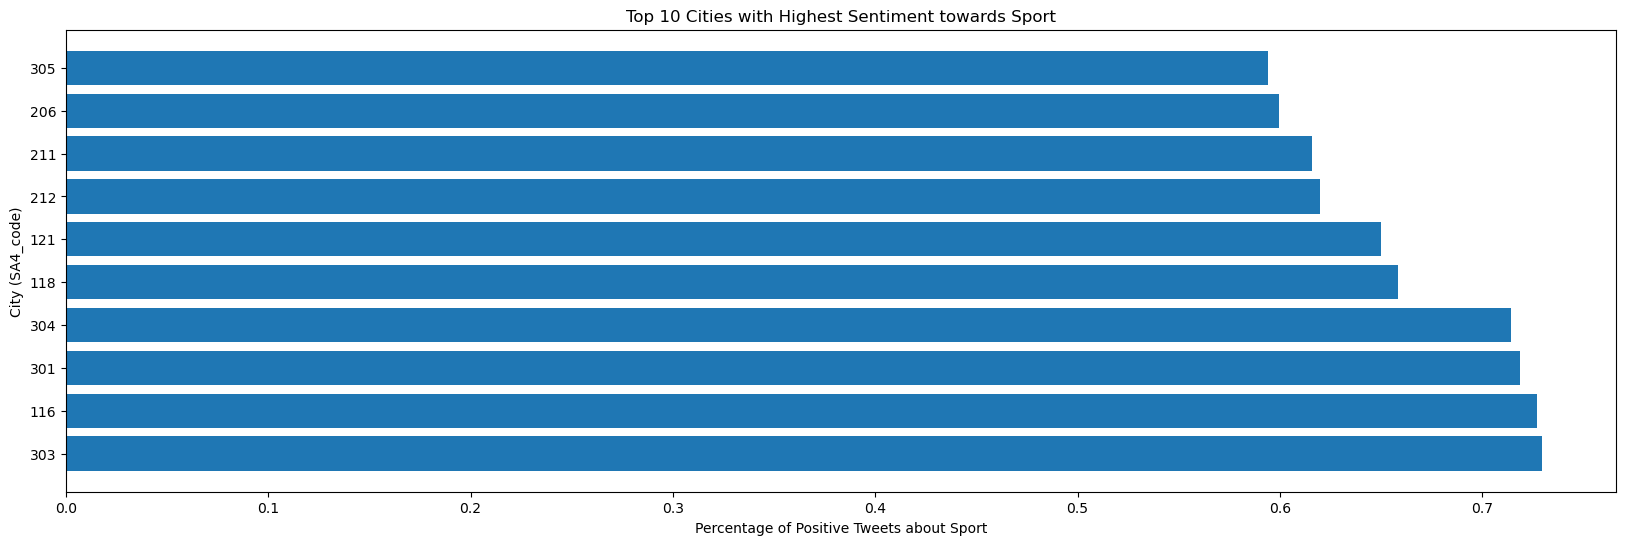

In [27]:
# Sort the DataFrame by the "percentage_posi_food" column
sport_sentiment_df_sorted = sport_sentiment_df.sort_values('sport_sentiment', ascending=False)[:10]

# Plot a horizontal bar plot
plt.figure(figsize=(20, 6))  # Adjust the figure size as needed
plt.barh(sport_sentiment_df_sorted['sa_code'], sport_sentiment_df_sorted['sport_sentiment'])
plt.xlabel('Percentage of Positive Tweets about Sport')
plt.ylabel('City (SA4_code)')
plt.title('Top 10 Cities with Highest Sentiment towards Sport')
plt.show()

In [30]:
sport_sentiment_df_sorted

js_dict = {}
for index, row in sport_sentiment_df_sorted.iterrows():
    sa4_code = int(row['sa_code'])
    population = float(row['sport_sentiment'])
    js_dict[sa4_code] = population

js_dict

with open('/Users/euniceyao/Documents/GitHub/CCC_A2/final_processed_data/extra_graph_data/sport_senti.json', 'w') as file:
    json.dump(js_dict, file)

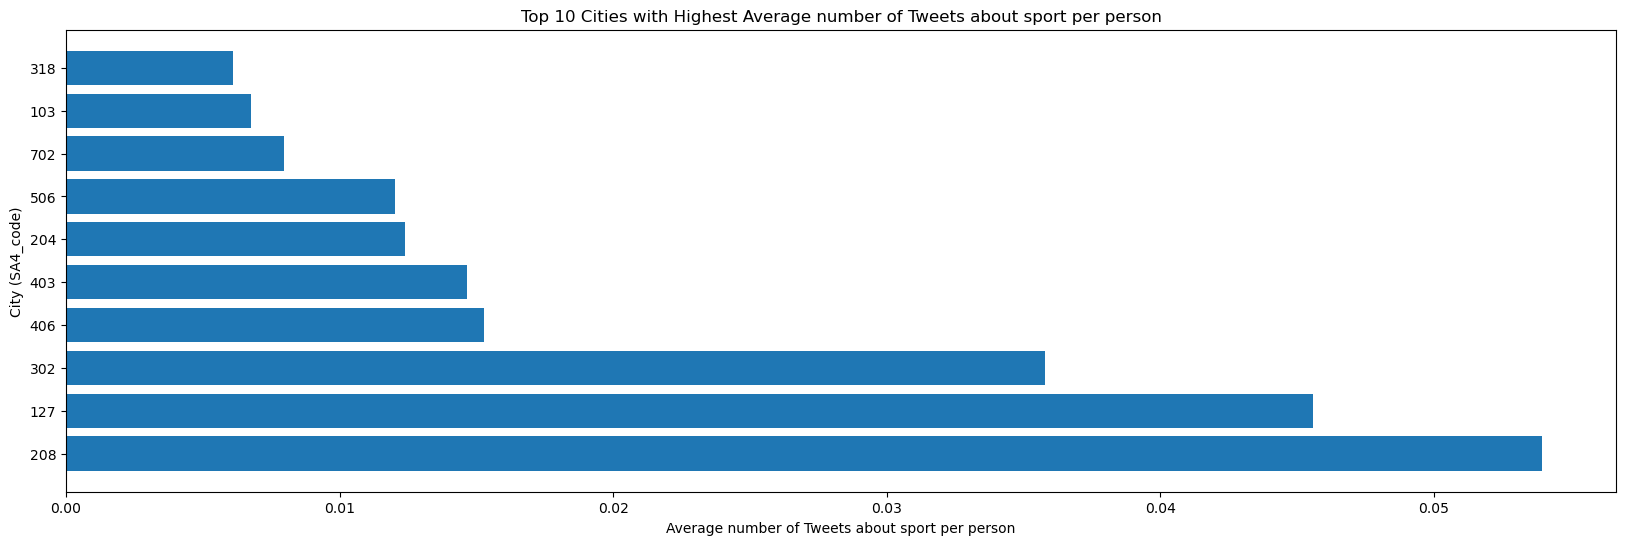

In [29]:
# Sort the DataFrame by the "percentage_posi_food" column
sport_tweets_pp_df_sorted = sport_tweets_pp_df.sort_values('sport_tweets_pp', ascending=False)[:10]

# Plot a horizontal bar plot
plt.figure(figsize=(20, 6))  # Adjust the figure size as needed
plt.barh(sport_tweets_pp_df_sorted['sa_code'], sport_tweets_pp_df_sorted['sport_tweets_pp'])
plt.xlabel('Average number of Tweets about sport per person')
plt.ylabel('City (SA4_code)')
plt.title('Top 10 Cities with Highest Average number of Tweets about sport per person')
plt.show()

In [31]:
sport_tweets_pp_df_sorted

js_dict = {}
for index, row in sport_tweets_pp_df_sorted.iterrows():
    sa4_code = int(row['sa_code'])
    population = float(row['sport_tweets_pp'])
    js_dict[sa4_code] = population

js_dict

with open('/Users/euniceyao/Documents/GitHub/CCC_A2/final_processed_data/extra_graph_data/sport_tweet_pp.json', 'w') as file:
    json.dump(js_dict, file)

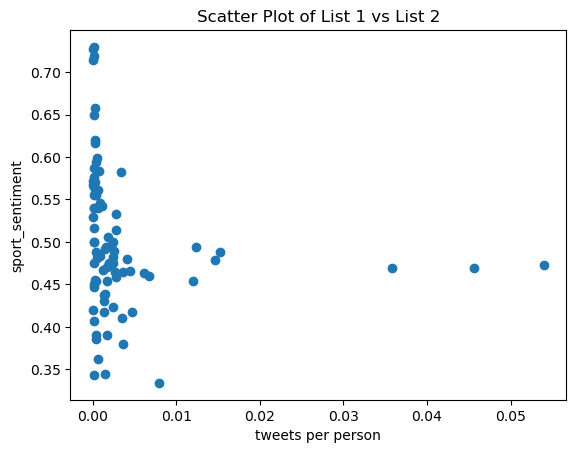

In [13]:
sport_sentiment_y = sport_sentiment_df['sport_sentiment']
sport_tweets_pp_x = sport_tweets_pp_df['sport_tweets_pp']

plt.scatter(sport_tweets_pp_x, sport_sentiment_y)
plt.xlabel('tweets per person')
plt.ylabel('sport_sentiment')
plt.title('Scatter Plot of List 1 vs List 2')
plt.show()

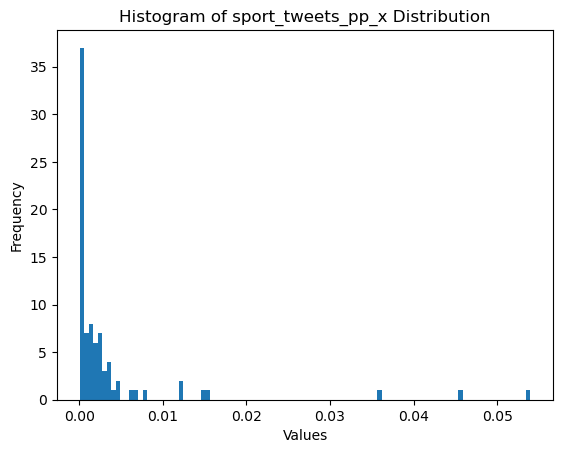

In [14]:
plt.hist(sport_tweets_pp_x, bins=100)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of sport_tweets_pp_x Distribution')
plt.show()

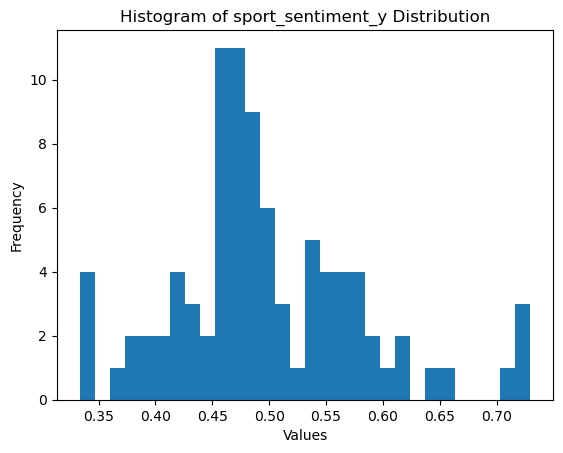

In [15]:
plt.hist(sport_sentiment_y, bins=30)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of sport_sentiment_y Distribution')
plt.show()

### explore food

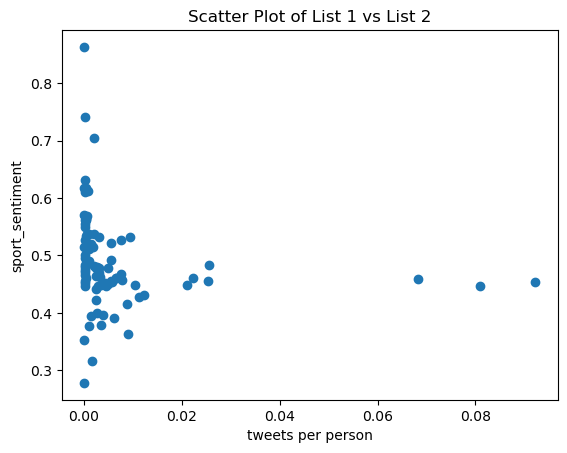

In [16]:
food_income_x = food_income_df['food_income'] 
food_positive_y = food_positive_df['food_positive']
food_tweets_pp_y = food_tweets_pp_df['food_tweets_pp']

plt.scatter(food_tweets_pp_y, food_positive_y)
plt.xlabel('tweets per person')
plt.ylabel('sport_sentiment')
plt.title('Scatter Plot of List 1 vs List 2')
plt.show()

### explore vehicle

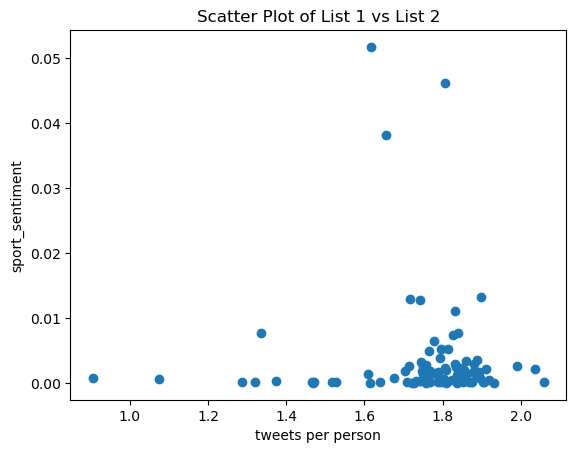

In [20]:
vehicle_avg_num_x = vehicle_avg_num_df['vehicle_avg_num'] 
vehicle_tweets_pp_y = vehicle_tweets_pp_df['vehicle_tweets_pp']
vehicle_positive_y = vehicle_positive_df['vehicle_positive']

plt.scatter(vehicle_avg_num_x, vehicle_tweets_pp_y)
plt.xlabel('tweets per person')
plt.ylabel('sport_sentiment')
plt.title('Scatter Plot of List 1 vs List 2')
plt.show()

### explore vehicle

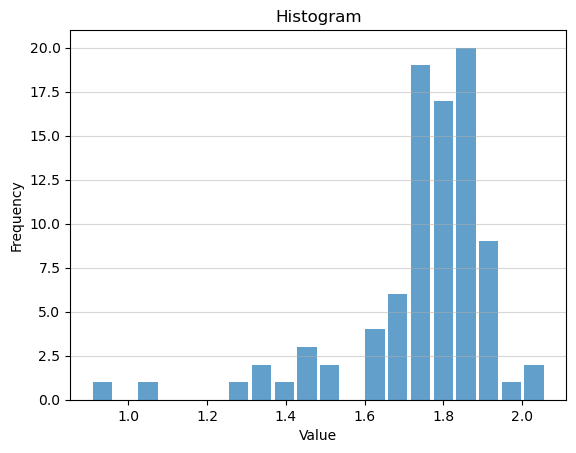

In [18]:
import matplotlib.pyplot as plt

def plot_histogram(data):
    plt.hist(data, bins='auto', alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.5)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()

# Example data
data = [1, 1, 1, 2, 3, 3, 4, 5, 5, 6, 6, 6, 7, 7, 8, 9]

# Call the function to plot the histogram
plot_histogram(vehicle_avg_num_x)